# Local Search Methods

## Hill Climbing & Simulated Annealing

- CAP 4630 Intro to AI: Methods Used to Solve N-Queens Problem

#### Import Libraries & Define Constants

In [10]:
import random
from math import exp
import time
from copy import deepcopy
import matplotlib.pyplot as plt

N_QUEENS = 64
TEMPERATURE = 4000

#### Define Dependent Functions:

In [11]:
def threat_calculate(n):
    # Combination formula. It is choosing two queens in n queens
    if n < 2:
        return 0
    if n == 2:
        return 1
    return (n - 1) * n / 2  # returns to the cost() function


def create_board(n):        # n = N_QUEENS
    # Create a chess board with a queen on a row
    chess_board = {}        # index of list = the row of each queen, value of index = the column of queen on the board.
    temp = list(range(n))   # create a list with N_QUEENS number of elements
    random.shuffle(temp)    # shuffle all the queens (random values) on the board to make sure it is random
    column = 0

    while len(temp) > 0:
        row = random.choice(temp)
        chess_board[column] = row
        temp.remove(row)
        column += 1
    del temp
    return chess_board      # returns to the search method: SA or HC


def cost(chess_board):
    # Calculate how many pairs of threatened queen
    threat = 0
    m_chessboard = {}
    a_chessboard = {}

    for column in chess_board:
        temp_m = column - chess_board[column]
        temp_a = column + chess_board[column]
        if temp_m not in m_chessboard:
            m_chessboard[temp_m] = 1
        else:
            m_chessboard[temp_m] += 1
        if temp_a not in a_chessboard:
            a_chessboard[temp_a] = 1
        else:
            a_chessboard[temp_a] += 1

    for i in m_chessboard:
        threat += threat_calculate(m_chessboard[i])
    del m_chessboard

    for i in a_chessboard:
        threat += threat_calculate(a_chessboard[i])
    del a_chessboard

    return threat               # returns to the search method: SA or HC

#### Define Hill Climbing Function:

In [12]:
def hill_climbing():
    # Hill Climbing Search
    solution_found = False
    answer = create_board(N_QUEENS)

    # To avoid recounting when can not find a better state
    cost_answer = cost(answer)  # given our initial layout, how many queens are attacking?
    
    # Record costs:
    Costs=[]
    Costs.append(cost_answer)

    t = TEMPERATURE             # erroneous: only for SA (delete)
    sch = 0.99                  # erroneous (delete)

    while t > 0.00001:          # change to `while x > 0` and define x. Calculate average # loops for a failed state.
        t *= sch                # erroneous: delete and replace with an integer
        successor = deepcopy(answer)    # create an identical successor from current state for modification
        while True:                     # Can we change to `while index_1 == index_2` and ditch the `break`?
            index_1 = random.randrange(0, N_QUEENS - 1) # pick a random number queen in the list
            index_2 = random.randrange(0, N_QUEENS - 1) # pick a random number queen in the list
            if index_1 != index_2:
                break
        successor[index_1], successor[index_2] = successor[index_2], \
            successor[index_1]          # swap the two randomly chosen queens 
        
        delta = cost(successor) - cost_answer   # cost of successor - cost of current state
        if delta < 0:                           # represents a "good" move: less # of queens attacking satisfies hill climbing
            answer = deepcopy(successor)        # move to that successor
            cost_answer = cost(answer)          # calculate the new cost
            Costs.append(cost_answer)
        if cost_answer == 0:                    # represents a solution: no queens attacking
            solution_found = True
            print("Successful Solution:")
            print_chess_board(answer)            
            break
    if solution_found is False:
        print("Failed")                         # Add a counter for how many loops until it fails
        return(False,Costs)
    else:
        return(True,Costs)

#### Function to Print Solution
 - (COLUMN) => (ROW)

In [13]:
def print_chess_board(board):
    # Print the chess board
    for column, row in board.items():
        print("{} => {}".format(column, row))

#### Define Simulated Annealing Function:

In [14]:
def simulated_annealing():
    # Simulated Annealing
    solution_found = False
    answer = create_board(N_QUEENS)

    # To avoid recounting when can not find a better state
    cost_answer = cost(answer)
    
    # Record costs:
    Costs = []
    Costs.append(cost_answer)

    t = TEMPERATURE
    sch = 0.99

    while t > 0.00001:
        t *= sch
        successor = deepcopy(answer)
        while True:
            index_1 = random.randrange(0, N_QUEENS - 1)
            index_2 = random.randrange(0, N_QUEENS - 1)
            if index_1 != index_2:
                break
        successor[index_1], successor[index_2] = successor[index_2], \
            successor[index_1]  # swap two chosen queens
        
        delta = cost(successor) - cost_answer
        if delta < 0 or random.uniform(0, 1) < exp(-delta / t):     # change from hill climbing: only for "good" moves
            answer = deepcopy(successor)
            cost_answer = cost(answer)
            Costs.append(cost_answer)
        if cost_answer == 0:
            solution_found = True
            print("Successful Solution:")
            print_chess_board(answer)            
            break
    if solution_found is False:
        print("Failed")
        return(False,Costs)
    else:
        return(True,Costs)

#### Main Function:

Failed
Failed
Failed
Failed
Failed
Failed
Failed
Failed
Failed
Failed
Failed
Failed
Failed
Failed
Failed
Failed
Failed
Failed
Failed
Successful Solution:
0 => 19
1 => 44
2 => 37
3 => 39
4 => 28
5 => 2
6 => 21
7 => 7
8 => 14
9 => 43
10 => 63
11 => 29
12 => 6
13 => 53
14 => 17
15 => 46
16 => 42
17 => 34
18 => 26
19 => 58
20 => 10
21 => 8
22 => 27
23 => 32
24 => 12
25 => 23
26 => 11
27 => 56
28 => 50
29 => 52
30 => 62
31 => 4
32 => 59
33 => 24
34 => 48
35 => 45
36 => 18
37 => 9
38 => 3
39 => 55
40 => 60
41 => 54
42 => 1
43 => 36
44 => 25
45 => 31
46 => 57
47 => 49
48 => 40
49 => 13
50 => 20
51 => 47
52 => 15
53 => 22
54 => 61
55 => 16
56 => 30
57 => 33
58 => 35
59 => 5
60 => 0
61 => 41
62 => 51
63 => 38
It takes 20 repetitions to succeed. Runtime in seconds 3.484797:


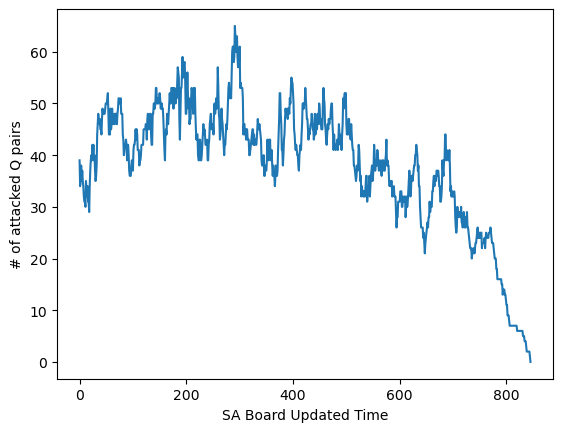

In [15]:
def main(method):
    start = time.time()
    Success = False
    repetitions = 0
    while not Success:
        if method == 'SA':
            Success, Costs = simulated_annealing()
            repetitions = repetitions + 1           # every time it fails and restarts is a repetition
            #plt.plot(Costs)
        elif method == 'HC':
            Success, Costs = hill_climbing()
            repetitions = repetitions + 1           # every time it fails and restarts is a repetition
            #plt.plot(Costs)
    print("It takes %d repetitions to succeed. Runtime in seconds %f:"% (repetitions,(time.time() - start)))
    return(Success,Costs)


if __name__ == "__main__":
    method = 'SA'           # 'SA' or 'HC'
    Success, Costs = main(method)  # HC: hill_climbing or SA: Simulated annealing
    plt.plot(Costs)
    plt.xlabel(method + ' Board Updated Time')
    plt.ylabel('# of attacked Q pairs')